# 目的
為替（Foreign eXchange, FX）のデータをダウンロードし、描画する。   

In [2]:
import urllib.request
import urllib.parse
import json
from pprint import pprint
import time
import datetime
# import pandas_datareader as pdr
import matplotlib.finance as mpf
import matplotlib.dates as mdates
from matplotlib import ticker
from general import drawfigfunc as dff

# リアルタイムダウンロード

## やりかたその１
<http://www.yoheim.net/blog.php?q=20160807>


In [3]:
def getFXRateWithYQL(pair="USDJPY"):
    """
    YQLをAPI経由で利用します
    
    """
    url = "https://query.yahooapis.com/v1/public/yql"
    params = {
        "q": 'select * from yahoo.finance.xchange where pair in ("{}")'.format(pair),
        "format": "json",
        "env": "store://datatables.org/alltableswithkeys"
    }
    url += "?" + urllib.parse.urlencode(params) # dictの中身をURLに変換する
    # print(url)
    res = urllib.request.urlopen(url)

    # 結果はJSON形式で受け取ることができます
    result = json.loads(res.read().decode('utf-8'))
#     pprint(result)
    """
    {'query': {'count': 1,
               'created': '2016-08-22T02:57:07Z',
               'lang': 'en-US',
               'results': {'rate': {'Ask': '100.6850',
                                    'Bid': '100.6380',
                                    'Date': '8/21/2016',
                                    'Name': 'USD/JPY',
                                    'Rate': '100.6380',
                                    'Time': '10:58pm',
                                    'id': 'USDJPY'}}}}
    """

    return result

In [4]:
i = 0
while i < 20:
    res = getFXRateWithYQL()
    _ = res["query"]["created"]
    Time = datetime.datetime.strptime(_, "%Y-%m-%dT%H:%M:%SZ")
    bid = res["query"]["results"]["rate"]["Bid"]
    ask = res["query"]["results"]["rate"]["Ask"]
    rate = res["query"]["results"]["rate"]["Rate"]
    print(Time, bid, ask, rate)
    time.sleep(0.5)
    i+=1

2017-03-29 02:26:55 111.1120 111.1150 111.1120
2017-03-29 02:26:56 110.4150 110.4170 110.4150
2017-03-29 02:26:57 110.4150 110.4170 110.4150
2017-03-29 02:26:58 111.1120 111.1150 111.1120
2017-03-29 02:26:59 111.1030 111.1080 111.1030
2017-03-29 02:27:00 111.1030 111.1080 111.1030
2017-03-29 02:27:01 111.1490 111.1580 111.1490
2017-03-29 02:27:02 111.1120 111.1150 111.1120
2017-03-29 02:27:03 111.1120 111.1150 111.1120
2017-03-29 02:27:04 111.1490 111.1580 111.1490
2017-03-29 02:27:05 111.1030 111.1080 111.1030
2017-03-29 02:27:06 111.1030 111.1080 111.1030
2017-03-29 02:27:07 111.1490 111.1580 111.1490
2017-03-29 02:27:08 111.1030 111.1080 111.1030
2017-03-29 02:27:09 111.1490 111.1580 111.1490
2017-03-29 02:27:10 111.1030 111.1080 111.1030
2017-03-29 02:27:11 111.1120 111.1150 111.1120
2017-03-29 02:27:13 111.1120 111.1150 111.1120
2017-03-29 02:27:14 110.4150 110.4170 110.4150
2017-03-29 02:27:15 111.1120 111.1150 111.1120


Yahoo! Financeは国内外で値が異なる？   

## やり方その２
こちらにやり方が載っている：<http://qiita.com/chromabox/items/a1323225bae146c80bec>   
外為オンラインさんが上げてくださっている<http://www.gaitameonline.com/rateaj/getrate>にアクセスすると値が取れる。   
構造は次のようになっている：
```
{'quotes': 
    [{'ask': '1.7826', 'bid': '1.7809', 'currencyPairCode': 'GBPNZD', 'high': '1.7824', 'low': '1.7735', 'open': '1.7742'},
     {'ask': '82.80', 'bid': '82.75', 'currencyPairCode': 'CADJPY', 'high': '83.09', 'low': '82.54', 'open': '83.04'}, 
     ...]}
ask: askの値
bid: bidの値
currrencyPairCode: 通貨ペア
high: その日のMAX
low : その日のMIN
open: 不明
```
日付が得られないので、リクエストした時点での日付を用いる。

In [64]:
def get_FX_from_gaitame(currencyPairCode="USDJPY"):
    """
    外為オンラインよりask/bidを取得する。
    
    ＜メソッドを作成するにあたって参考にしたHP＞
        http://qiita.com/chromabox/items/a1323225bae146c80bec
    
    ＜注意事項＞
        １秒ごとに更新されるが、このメソッドで１秒ごとに取得することはネチケット上やめるべき。
        最低でも２秒は空けたい。
    
    ＜入力＞
        currencyPairCode: 外貨ペア
    
    ＜出力＞
        nowtime: リクエストしたときの日時
        ask: 対象とする外貨ペアのask
        bid: 対象とする外貨ペアのbid
    """
    url = "http://www.gaitameonline.com/rateaj/getrate"
    nowtime = datetime.datetime.now()
    res = urllib.request.urlopen(url)
    quotes = json.loads(res.read().decode('utf-8'))["quotes"]
    for quo in quotes:
        if quo["currencyPairCode"] == currencyPairCode: 
            ask = float(quo["ask"])
            bid = float(quo["bid"])
            break
#     print(nowtime.strftime("%Y-%m-%d %H:%M:%S"), "ask:", ask, "bid:", bid)
    return nowtime, ask, bid

In [16]:
i = 0
while i < 20:
    print(get_FX_from_gaitame())
    time.sleep(2)
    i+=1

(datetime.datetime(2017, 3, 27, 18, 38, 53, 763966), '110.34', '110.33')
(datetime.datetime(2017, 3, 27, 18, 38, 56, 509712), '110.34', '110.33')
(datetime.datetime(2017, 3, 27, 18, 38, 59, 119670), '110.34', '110.33')
(datetime.datetime(2017, 3, 27, 18, 39, 1, 899449), '110.34', '110.33')
(datetime.datetime(2017, 3, 27, 18, 39, 4, 504290), '110.34', '110.33')
(datetime.datetime(2017, 3, 27, 18, 39, 7, 109575), '110.34', '110.33')
(datetime.datetime(2017, 3, 27, 18, 39, 9, 780582), '110.34', '110.33')
(datetime.datetime(2017, 3, 27, 18, 39, 12, 413930), '110.34', '110.33')
(datetime.datetime(2017, 3, 27, 18, 39, 14, 982599), '110.33', '110.32')
(datetime.datetime(2017, 3, 27, 18, 39, 17, 610314), '110.34', '110.33')
(datetime.datetime(2017, 3, 27, 18, 39, 20, 159214), '110.33', '110.32')
(datetime.datetime(2017, 3, 27, 18, 39, 22, 812909), '110.34', '110.33')
(datetime.datetime(2017, 3, 27, 18, 39, 25, 438308), '110.33', '110.32')
(datetime.datetime(2017, 3, 27, 18, 39, 28, 105229), '1

スキャルピング取引を行いたい場合は、どれも速度が足りない。   
より詳細な値必要な場合は、FX会社が提供しているAPIを利用するべきであろう。   
１時間単位などの取引であれば、外為オンライン様が提供しているJSON形式の値を利用するのがよさそうである。

## pandas-datareaderを利用する方法
単位が１日であるから、リアルタイム解析には利用できない。

In [4]:
start = "2017-03-10"
end = "2017-03-27"
res = pdr.DataReader('DEXJPUS', 'fred', start, end)
print(res)

            DEXJPUS
DATE               
2017-03-10   115.02
2017-03-13   114.61
2017-03-14   114.63
2017-03-15   114.66
2017-03-16   113.02
2017-03-17   112.67


## プロット
外為オンラインよりデータをダウンロードし、それを描画する。   
pandasに描画機能がついているので、それを利用する。   
参考：<http://qiita.com/u1and0/items/1d9afdb7216c3d2320ef>、<http://sinhrks.hatenablog.com/entry/2015/11/15/222543>

In [59]:
i = 0
nowtimes = []
fx = []
while i < 10:
    nowtime, ask, bid = get_FX_from_gaitame()
    nowtimes.append(nowtime.strftime("%H:%M:%S"))
    fx.append([ask, bid])
#     print(fx)
    time.sleep(1.5)
    i+=1
df = pd.DataFrame(fx, columns=["ask", "bid"])
df.index = nowtimes

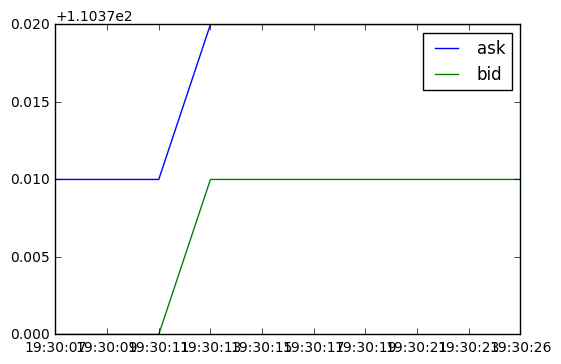

In [63]:
fig = dff.makefig(5,5)
df.plot()

# 過去データのプロット
過去のデータを取ってきて、それをローソク足で描画する。   

参考：<http://qiita.com/toyolab/items/1b5d11b5d376bd542022>
```
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
from matplotlib import ticker
import matplotlib.dates as mdates
import pandas as pd

fig = plt.figure()
ax = plt.subplot()

ohlc = np.vstack((range(len(df)), df.values.T)).T #x軸データを整数に
mpf.candlestick_ohlc(ax, ohlc, width=0.8, colorup='r', colordown='b')

xtick0 = (5-df.index[0].weekday())%5 #最初の月曜日のインデックス

plt.xticks(range(xtick0,len(df),5), [x.strftime('%Y-%m-%d') for x in df.index][xtick0::5])
ax.grid(True) #グリッド表示
ax.set_xlim(-1, len(df)) #x軸の範囲
fig.autofmt_xdate() #x軸のオートフォーマット
```

## 過去データの取得
どうやら過去のデータは、５分単位でしか取得されない模様、、   
なので自分で実装して落としておくことにする。   
それはこのノートブックではやらない。

## リアルタイム描画用設計
ローソク足チャートを描くには、open/high/low/close (OHLC)が必要。設計としては、、   

1. ２秒に一回のペースで取得し、リスト形式で格納する
    + これはlist.appendで良い
1. １分に一回のペースでOHLCを計算する
    + つまり30このデータごとにOHLCを計算する
1. 計算されたOHLCをnumpy.ndarrayに格納する
    + 正直、時間軸は開始時からの値で良いと思われる。
    + なのでx軸は整数にしてしまう。
1. OHLCをプロットする


# リアルタイム描画

## テスト

# 日付の取得

In [18]:
now = datetime.datetime.now()
if now.weekday() in [4] and now.hour >= 6 and now.minute >= 0.0:
        print("ok")

ok


In [17]:
now.minute

0